# Analizis Exploratorio de Datos

## Importar librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Carga de datos

In [3]:
df = pd.read_csv("C:/Users/Alejandro/Desktop/Datos_unidos_light.csv")

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_18076\3635710233.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Alejandro/Desktop/Datos_unidos_light.csv")


### Valores duplicados

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,id,duration_int,duration_type,userId,score,timestamp
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",as1,113,min,543,5.0,2003-07-30
1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",as1,113,min,595,3.0,1996-08-13
2,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",as1,113,min,611,3.0,2001-01-03
3,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",as1,113,min,2523,3.5,2012-06-25
4,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",as1,113,min,3082,4.0,2000-03-30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9515204 entries, 0 to 9524289
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   show_id        object 
 1   type           object 
 2   title          object 
 3   director       object 
 4   cast           object 
 5   country        object 
 6   date_added     object 
 7   release_year   int64  
 8   rating         object 
 9   listed_in      object 
 10  id             object 
 11  duration_int   int64  
 12  duration_type  object 
 13  userId         int64  
 14  score          float64
 15  timestamp      object 
dtypes: float64(1), int64(3), object(12)
memory usage: 1.2+ GB


## Escogiendo la Data

### Filtrado colaborativo

In [8]:
# Con ayuda de chatGPT pedi sugerencias para saber que tipo de modelo seria bueno para un sistema de recomendacion.
# Dentro de las ejemplos que medio me llamo la atencion el llamado Filtro colaborativo
# Este metodo solo necesita de los score y de los usuarios asi que de aqui partire para un EDA solo de los datos que me interesa
df1 = df.loc[:, ["userId", "score","id"]]
df1.head()

,userId,score,id
0,543,5.0,as1
1,595,3.0,as1
2,611,3.0,as1
3,2523,3.5,as1
4,3082,4.0,as1


In [11]:
# Colocare el nombre de las peliculas en otro DataFrame
df2 = df2 = df.loc[:,["id", "title"]]
df2.drop_duplicates(inplace=True) # Nombres de peliculas
df2.head()

,id,title
0,as1,the grand seduction
449,as2,take care good night
878,as3,secrets of deception
1240,as4,pink: staying true
1646,as5,monster maker


In [13]:
# Con esto conomemos el numero de usuarios  y la cantidad de peliculas con los que contamos
num_peliculas = df2.shape
num_usuarios = len(df1["userId"].unique())
print("El numero de pelicuas es: {} y el numero de usuarios es: {}".format(num_peliculas[0],num_usuarios))

El numero de pelicuas es: 22998 y el numero de usuarios es: 99170


In [19]:
#Caliicaciones de peliculas por usuario
df1_by_users = df1.groupby(["userId"]).count()
df1_by_users = df1_by_users.sort_values(by="id", ascending=False)
df1_by_users.head()

,score,id
userId,,
45811,18047,18047
8659,9255,9255
270123,7500,7500
70648,5336,5336
74275,4814,4814


## Representacion Grafica de los datos

### Calificaciones por usuario

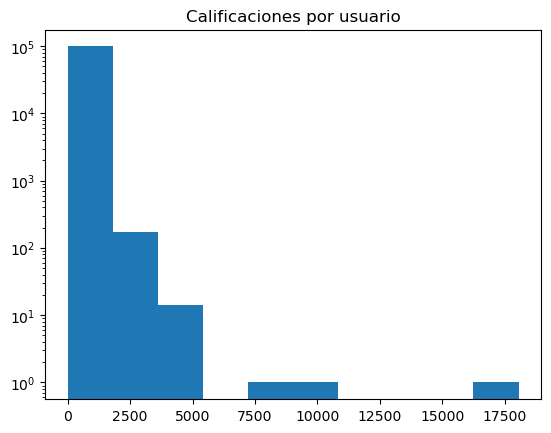

In [16]:
plt.hist(df1_by_users.score, log= True)
plt.title('Calificaciones por usuario')
plt.show()

Podemos observar que la mayoria de los usuarios han calificado entre 0 - 2500 peliculas y hay un usuario que ha dado 18047 calificacion, realmente no se que pensar sobre ese usuario, no hay valores dupliados asi que solo me queda pensar que esta viendo one piece, no descartare a ese usuario.

### Distribucion de calificaciones

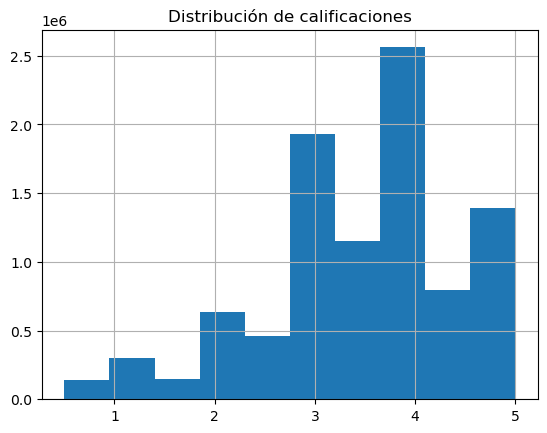

In [20]:
# Observamos la distribución de las calificaciones

df1['score'].hist()
plt.title('Distribución de calificaciones')
plt.show()

Esta grafica muestra como estan distribuidas las calificaciones, valores entre 3 y 4 son los que destacan

In [22]:
# Pelicula que mas calificaciones tuvo
df1_by_movies = df1.groupby(['id']).count()
df1_by_movies = df1_by_movies.sort_values(by="score", ascending=False)
df1_by_movies.head()

,userId,score
id,,
as4197,496,496
as1254,494,494
as4889,491,491
as9065,488,488
as1512,488,488


In [23]:
df2[df2["id"] == 'as4197']

,id,title
1739345,as4197,from other worlds


In [24]:
#Pelicula que menos calificaciones tuvo
df1_by_movies.tail()

,userId,score
id,,
as5305,345,345
ns6535,343,343
as3489,342,342
ds706,334,334
ns5759,331,331


In [25]:
df2[df2["id"] == 'ns5759']

,id,title
8260385,ns5759,russell peters: almost famous


In [26]:
# Peliculas por popularidad
df1_by_movies = df1.groupby(['id'], as_index=False).count() #Agrupamos por pelicula
df1_by_movies.sort_values('userId', ascending = False, inplace = True)
df1_by_movies['Vistos'] = df1_by_movies['userId']
df1_by_movies.drop(columns = ['userId','score'], inplace = True)
df1_by_movies.head(10)

,id,Vistos
3553,as4197,496
284,as1254,494
4321,as4889,491
8962,as9065,488
571,as1512,488
19462,ns5743,487
14057,hs879,486
16942,ns3475,486
20011,ns6237,484
16646,ns3208,484


In [27]:
# Observamos que peliculas son
df1_by_movies = df1_by_movies.merge(df2)
df1_by_movies.head()

,id,Vistos,title
0,as4197,496,from other worlds
1,as1254,494,prisoners' wives
2,as4889,491,a stone in the water
3,as9065,488,the organization
4,as1512,488,nba the essentials: boston celtics � 1988 east...


### Distribucion de la cantidad de vistas

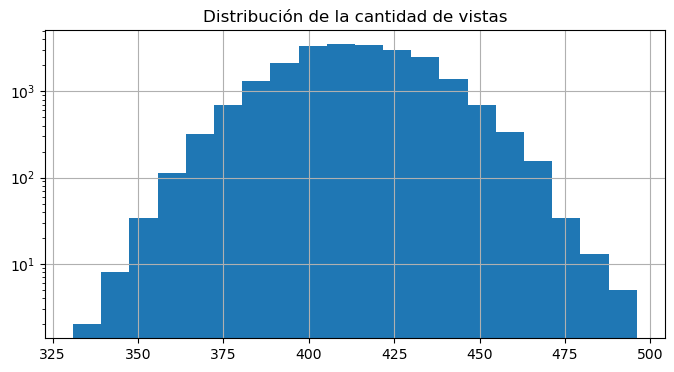

In [28]:
plt.figure(figsize = (8,4))

df1_by_movies.Vistos[df1_by_movies.Vistos<500].hist(log = True, bins = 20)
plt.title('Distribución de la cantidad de vistas')

plt.show()

En este grafico podemos ver como se distribuye la cantidad de vistas.
Dado que no hay una pelicula realmente poco calificada ni una que lo este mucho no descartare a ninguna.

In [30]:
cantidad_calificaciones = df1.shape
print("El total de calificaciones son:", cantidad_calificaciones[0])

El total de calificaciones son: 9515204


## Exportacion de los datos 

### Calificaciones de usuarios

In [32]:
df1.to_csv("Machine_Learning_Data/Calificaciones.csv", index=False)

### Nombre de las peliculas

In [33]:
df2.to_csv("Machine_Learning_Data/Titulos.csv", index=False)